# Improving performance

In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [23]:
# Load the data
df = pd.read_csv('../data/new_titanic_features.csv')

In [72]:
# scaler = preprocessing.StandardScaler()#.fit(X_train)
# # scaler.transform(X_train)
# df['Age2'] = scaler.fit_transform(df[['Age2']])

In [73]:
# Create Features and Labels
X = df[['Male', 'Family',
        'Pclass2_one', 'Pclass2_two', 'Pclass2_three',
        'Embarked_C', 'Embarked_Q', 'Embarked_S',
        'Age2', 'Fare3_Fare11to50', 'Fare3_Fare51+', 'Fare3_Fare<=10']]
y = df['Survived']


In [91]:
# X.describe()
# X.head()

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=0)

In [79]:
X_train.head()

,Male,Family,Pclass2_one,Pclass2_two,Pclass2_three,Embarked_C,Embarked_Q,Embarked_S,Age2,Fare3_Fare11to50,Fare3_Fare51+,Fare3_Fare<=10
363,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.086940,1.0,0.0,0.0
255,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.577446,0.0,1.0,0.0
476,1,1,0.0,0.0,1.0,0.0,0.0,1.0,-0.053204,0.0,0.0,1.0
271,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.787663,1.0,0.0,0.0
553,0,0,0.0,0.0,1.0,0.0,0.0,1.0,-0.543710,0.0,0.0,1.0


In [106]:
from sklearn.linear_model import LogisticRegression


In [128]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [130]:
# Baseline, so initial test of 0.719 better than baseline
y_train.value_counts() / len(y_train)

0    0.624473
1    0.375527
Name: Survived, dtype: float64

In [131]:
print('Train Accuracy: {:0.3}'.format(accuracy_score(y_train, pred_train)))
print('Test Accuracy: {:0.3}'.format(accuracy_score(y_test, pred_test)))

Train Accuracy: 0.82
Test Accuracy: 0.725


In [132]:
confusion_matrix(y_test, pred_test)

array([[87, 18],
       [31, 42]])

In [133]:
print(classification_report(y_test, pred_test))

             precision    recall  f1-score   support

          0       0.74      0.83      0.78       105
          1       0.70      0.58      0.63        73

avg / total       0.72      0.72      0.72       178



## Feature importances (wrong! see exercise 1)

In [134]:
# Simplistic, large coefficients are important
# model.coef_
# Bias
# model.intercept_
# Initial small coefficient of Age2 because Age2 not normalized

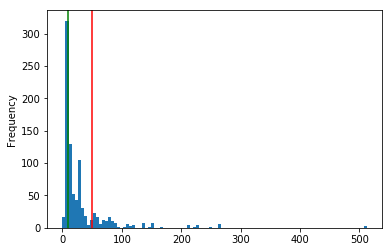

In [135]:
df['Fare'].plot(kind='hist', bins=100)
plt.axvline(10, color='green')
plt.axvline(50, color='red')

In [136]:
df.groupby(['Pclass', 'Survived'])['PassengerId'].count()

Pclass  Survived
1       0            80
        1           134
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

In [137]:
coeffs = pd.Series(model.coef_.ravel(), index=X.columns)
coeffs

Male               -2.614573
Family             -0.080876
Pclass2_one         1.176933
Pclass2_two         0.469146
Pclass2_three      -0.767173
Embarked_C          0.386054
Embarked_Q          0.752722
Embarked_S         -0.259870
Age2               -0.467446
Fare3_Fare11to50    0.193787
Fare3_Fare51+       0.582957
Fare3_Fare<=10      0.102162
dtype: float64

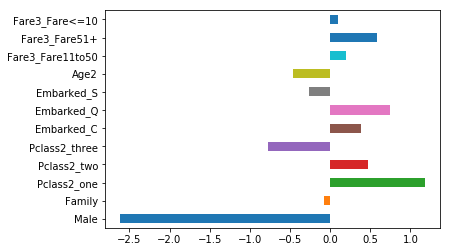

In [138]:
coeffs.plot(kind='barh')

## Cross Validation

In [139]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

In [140]:
cv = ShuffleSplit(n_splits=5, test_size=.4, random_state=0)
scores = cross_val_score(model, X, y, cv=cv)
scores

array([0.76123596, 0.78370787, 0.78932584, 0.78651685, 0.82303371])

In [141]:
'Crossval test scores: %0.3f +/- %0.3f ' % (scores.mean(), scores.std())

'Crossval test scores: 0.789 +/- 0.020 '

In [142]:
# So, which scores do we use?
# Retrain on all the data, cross validation establishes worst case scenario

## Learning curve

In [143]:
from sklearn.model_selection import learning_curve

In [144]:
tsz = np.linspace(0.1, 1, 10)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=tsz)

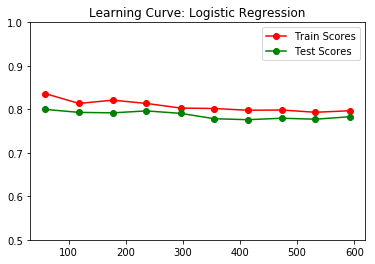

In [145]:
fig = plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), 'ro-', label="Train Scores")
plt.plot(train_sizes, test_scores.mean(axis=1), 'go-', label="Test Scores")
plt.title('Learning Curve: Logistic Regression')
plt.ylim((0.5, 1.0))
plt.legend()
plt.draw()
plt.show()

### Exercise 1

Try rescaling the Age feature with [`preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/preprocessing.html) so that it will have comparable size to the other features.

- Do the model prediction change? Yes, a bit.
- Does the performance of the model change? Yes, a bit.
- Do the feature importances change? Yes, Age2 becomes more significant (large coefficient)
- How can you explain what you've observed?

In [ ]:
# use .copy() and new variables to do these exercises in the future
# Why not transform everything?
scaler = preprocessing.StandardScaler()#.fit(X_train)
sc.fit(X_train[['Age2']])
# scaler.transform(X_train)
# df['Age2'] = scaler.fit_transform(df[['Age2']])

In [153]:
X_train_sc = X_train.copy()
X_test_sc = X_test.copy()
X_train_sc['Age2'] = scaler.transform(X_train[['Age2']])
X_test_sc['Age2'] = scaler.transform(X_test[['Age2']])
#  ...

### Exercise 2

Experiment with another classifier for example `DecisionTreeClassifier`, `RandomForestClassifier`,  `SVC`, `MLPClassifier`, `SGDClassifier` or any other classifier of choice you can find here: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html. 

- Train the model on both the scaled data and on the unscaled data
- Compare the score for the scaled and unscaled data
- how can you get the features importances for tree based models? Check [here](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) for some help.
- Which classifiers are impacted by the age rescale? Why?

In [125]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

Train Accuracy: 0.935
Test Accuracy: 0.73


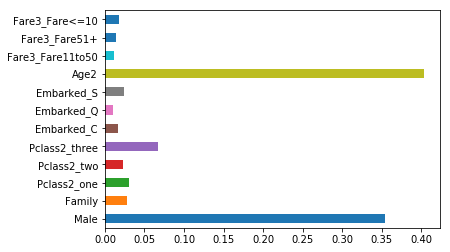

In [156]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print('Train Accuracy: {:0.3}'.format(accuracy_score(y_train, pred_train)))
print('Test Accuracy: {:0.3}'.format(accuracy_score(y_test, pred_test)))

coeffs = pd.Series(model.feature_importances_, index=X.columns)
coeffs.plot(kind='barh')

Feature ranking:


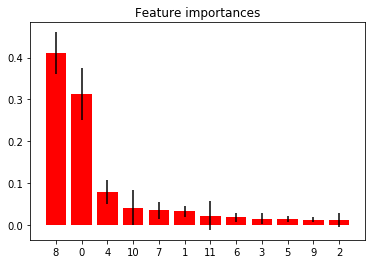

In [151]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Exercise 3

Pick your preferred classifier from Exercise 2 and search for the best hyperparameters. You can read about hyperparameter search [here](http://scikit-learn.org/stable/modules/grid_search.html)

- Decide the range of hyperparameters you intend to explore
- Try using [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) to perform brute force search
- Try using [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) for a random search
- Once you've chosen the best classifier and the best hyperparameter set, redo the learning curve.
Do you need more data or a better model?